In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cycle tests of muscle with 3/4 inch sleeve diameter
# Tests carried out with 60psi air
# Format: [construction, length (inches), cycles until failure]

def plot_charts():
    data = [
        ["PET sleeve - one ending with barbed fitting other with clamp", 10, 30],
        ["PET sleeve - both endings with barbed fitting", 10, 31],
        ["PET sleeve - both endings with clamps", 10, 128],
        ["Kevlar sleeve - both endings with barbed fitting", 10, 19],
        ["PET double sleeve - ??", 10, 1316],
    ]

    df = pd.DataFrame(data, columns=["Construction", "Length (in)", "Cycles"])

    # Sort by cycles for better visualization
    df = df.sort_values("Cycles", ascending=True)

    # Create figure with dark theme
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(12, 6))

    # Color palette - gradient from red (worst) to green (best)
    colors = plt.cm.RdYlGn(np.linspace(0.15, 0.85, len(df)))

    # Horizontal bar chart
    bars = ax.barh(df["Construction"], df["Cycles"], color=colors, edgecolor='white', linewidth=0.5)

    # Add value labels on bars
    for bar, cycles in zip(bars, df["Cycles"]):
        width = bar.get_width()
        ax.text(width + 20, bar.get_y() + bar.get_height()/2, 
                f'{cycles:,}', va='center', ha='left', fontsize=11, fontweight='bold')

    # Styling
    ax.set_xlabel("Cycles Until Failure", fontsize=12, fontweight='bold')
    ax.set_title("Muscle Cycle Endurance Test Results\n(3/4\" sleeve diameter, 60 PSI)", 
                fontsize=14, fontweight='bold', pad=15)
    ax.set_xlim(0, max(df["Cycles"]) * 1.15)

    # Add grid
    ax.xaxis.grid(True, alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Cycle tests
Tests were carried out with 10" long pneumatic artificial muscles (PAMs) with 60psi pressure air. Test was ended when PAM exploded. In case of PET double sleeve test was ended sooner as it was not going to explode anytime soon as sleeve didn't look damaged. Tests were carried out with different ending of PAMs as it makes a difference.

## Types of tested endings
| Clamped ending | Barbed fitting ending |
|----------------|-----------------------|
| Fuel line tubing with latex tube on it, PET sleeve on it and held together by clamp. | Barbed fitting clamped togeter with latex tube and sleeve. |
| ![](./graphics/clamp_ending.jpg) | ![](./graphics/barbed_fitting_ending.jpg) |

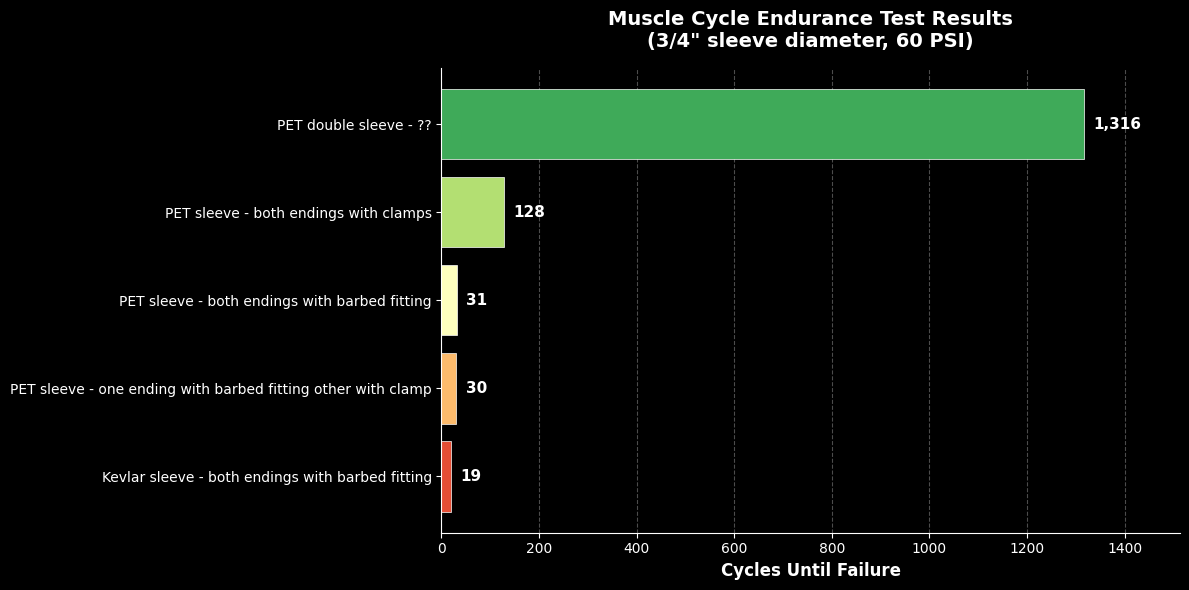

In [24]:
plot_charts()